**Women's Clothing E-Commerce Reviews **

In this Notebook, I explored the below things:-

1. The age group of female who wrote the most, least, and very few reviews
2. The age group bought what kind of product (Department names) 
3. The age group bought what kind of product (Class names) 
4. The Department has what number or percentage of Class names
5. Which Division name has what number of Department names 
6. Which Division name has what number of Class name
7. Count the frequency of words in Review Text column
8. Wordcloud of the Review Text column
9. Review Text column - How many are positive, negative, and neutral reviews based on the sentiment and polarity value.
10. Wordcloud of the positive Review Text column
11. Wordcloud of the negative Review Text column
12. Used Multinomial Naive Bayes Algorithm to predict which product has 5 rating and which has 1 rating?
13. Used Multinomial Naive Bayes Algorithm to predict which product is recommended and which is not?



*Required Libraries:-*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling
%matplotlib inline

*Importing file into dataframe*

In [3]:
df_rough=pd.read_csv("C:\W_ClothingReview.csv",index_col=False)
column_contain=['Clothing ID','Age','Title','Review Text','Rating','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name']

In [4]:
df=pd.DataFrame(data=df_rough,columns=column_contain)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


*This dataset has 23486 entries and 9 columns. Some of the entries are missing like Title, Division Name, Department Name, and Class Name. *

In [5]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


*Is there any correlation between user's rating and reviews length ?*

In [7]:
df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)

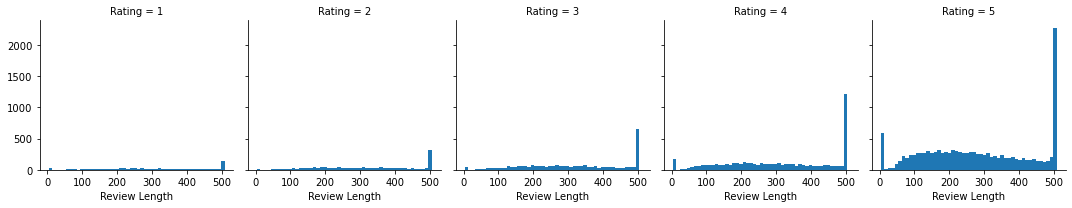

In [8]:
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Review Length', bins=50)

*From the above chart, we can say that the users gave 5 rating oftenly. Infact, there are less no of users who gave rating 1 and 2.*

<AxesSubplot:xlabel='Rating', ylabel='Review Length'>

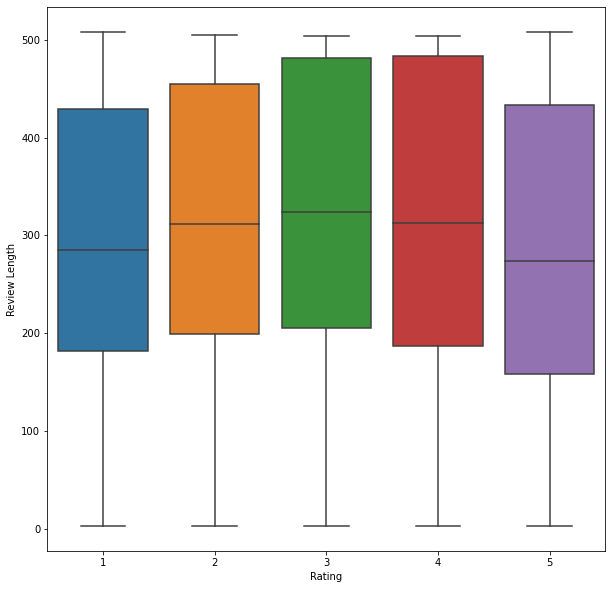

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Review Length', data=df)

*From the above boxplot, we can conclude that the rating 3 and 4 have more lenth in review. *

In [10]:
rating = df.groupby('Rating').mean()
rating.corr()

,Clothing ID,Age,Recommended IND,Positive Feedback Count,Review Length
Clothing ID,1.000000,-0.977686,-0.303355,0.378828,0.975037
Age,-0.977686,1.000000,0.115681,-0.194958,-0.930949
Recommended IND,-0.303355,0.115681,1.000000,-0.987748,-0.307808
Positive Feedback Count,0.378828,-0.194958,-0.987748,1.000000,0.384312
Review Length,0.975037,-0.930949,-0.307808,0.384312,1.000000


<AxesSubplot:>

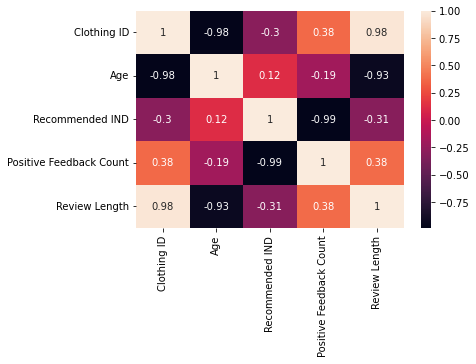

In [11]:
sns.heatmap(data=rating.corr(), annot=True)

The above correlation map shows that there is not much correlation among the column. The columns like review length and positive feedback count are slightly correlated. And, the number 0.93 in negative inidicates that it is nowhere correlated with Review Length. As the Age grows the length of review decreases.

In [12]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


<AxesSubplot:xlabel='Age'>

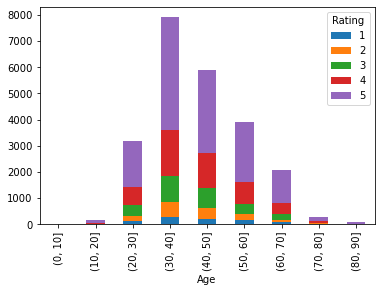

In [13]:
df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

*From the above barplot, we can say that the age group 10-20 gave less rating. It is obvious. In this age group teenagers generally don't care about online shopping and reviews. The age group 30-40 gave more 5 rating as compared to all the other age groups. In fact, this is the age group who gave most of the reviews and ratings. And similarly, the age group above 70 did not care about the online shopping stuff. *

<AxesSubplot:xlabel='Age'>

<Figure size 1080x1080 with 0 Axes>

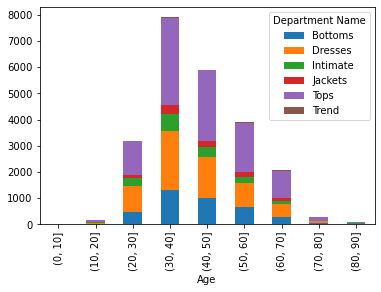

In [14]:
plt.figure(figsize=(15,15))
df.groupby(['Department Name', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

*In the above barplot, I want to concentrate on the department and the age group. The females from 20-70 age were more active and bought the stuff online. From the above barplot, we can conclude that the females were more focussed on Tops and Dressess department. And, somewhat focussed on Bottoms too but not that much. They were less concentrated on Trend department. *

<AxesSubplot:xlabel='Age'>

<Figure size 1080x1080 with 0 Axes>

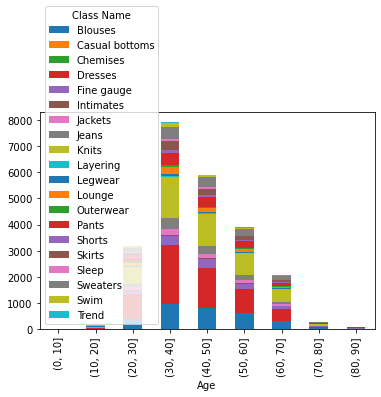

In [15]:
plt.figure(figsize=(15,15))
df.groupby(['Class Name', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)


Text(0.5, 1.0, 'Counts Vs Department Name')

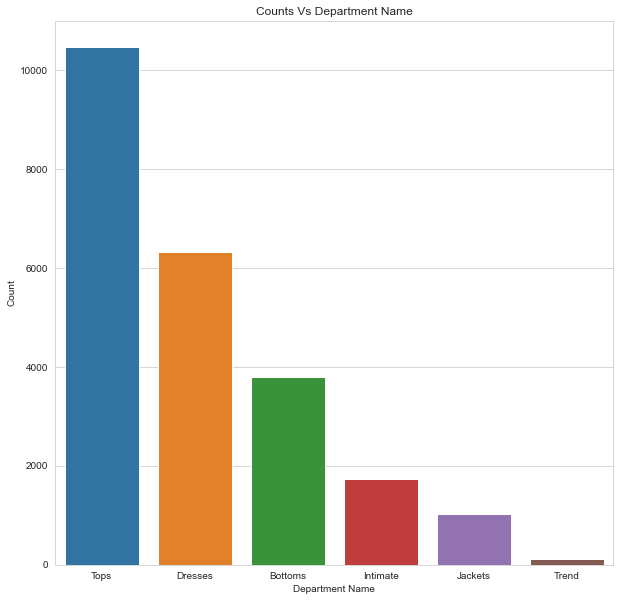

In [16]:
z=df.groupby(by=['Department Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['Department Name'],y=z['Class Name'], data=z)
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.title("Counts Vs Department Name")

*The above barplot shows that there are maximum entries for Top which is around 10500. And, then the Dresses department is having around 6000 entries*

Text(0.5, 1.0, 'Counts Vs Division Name')

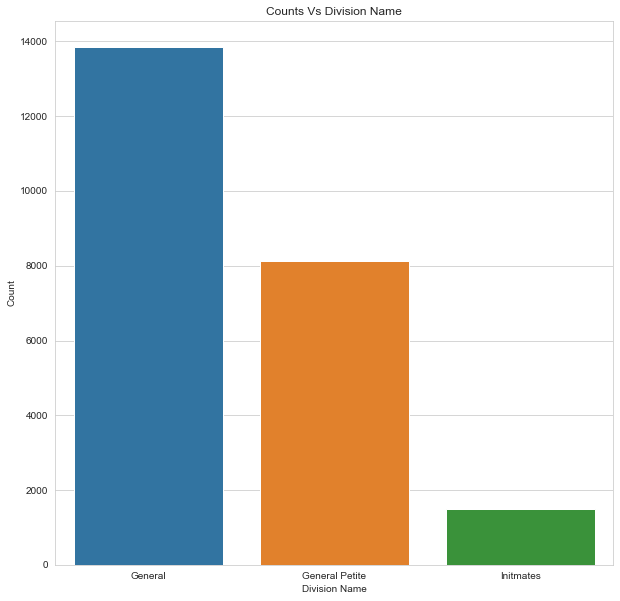

In [17]:
w=df.groupby(by=['Division Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=w['Division Name'],y=w['Class Name'], data=w)
plt.xlabel("Division Name")
plt.ylabel("Count")
plt.title("Counts Vs Division Name")

*In our dataset, there are 3 divisions which are General, General Petite, and Intimates. The General Division producs were more sold out as compared to General Petite and Intimates. There were around 14K producs were sold in General division, 8K products in General Petite division and around 1600 products were sold in Initmates division.  *

In [33]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
#from stopwords import get_stop_words
from nltk.tokenize import RegexpTokenizer
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re

ModuleNotFoundError: No module named 'wordcloud'

In [36]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data

[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\aksha\AppData\

True

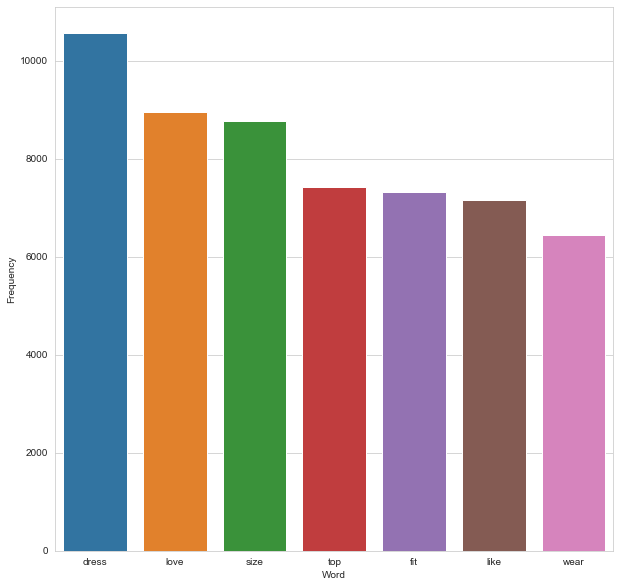

In [37]:
top_N = 100
import re
import nltk
#nltk.download('stopwords')
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df['Review Text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
         
stop_words = list(stopwords.words('english'))   


word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

*The above barplot calculates the frequency of the word in Review Text column. The word Dress appeared more in the text. Next to this, the word Love comes second which is an indicator of positive review. *

In [40]:
from wordcloud import WordCloud
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

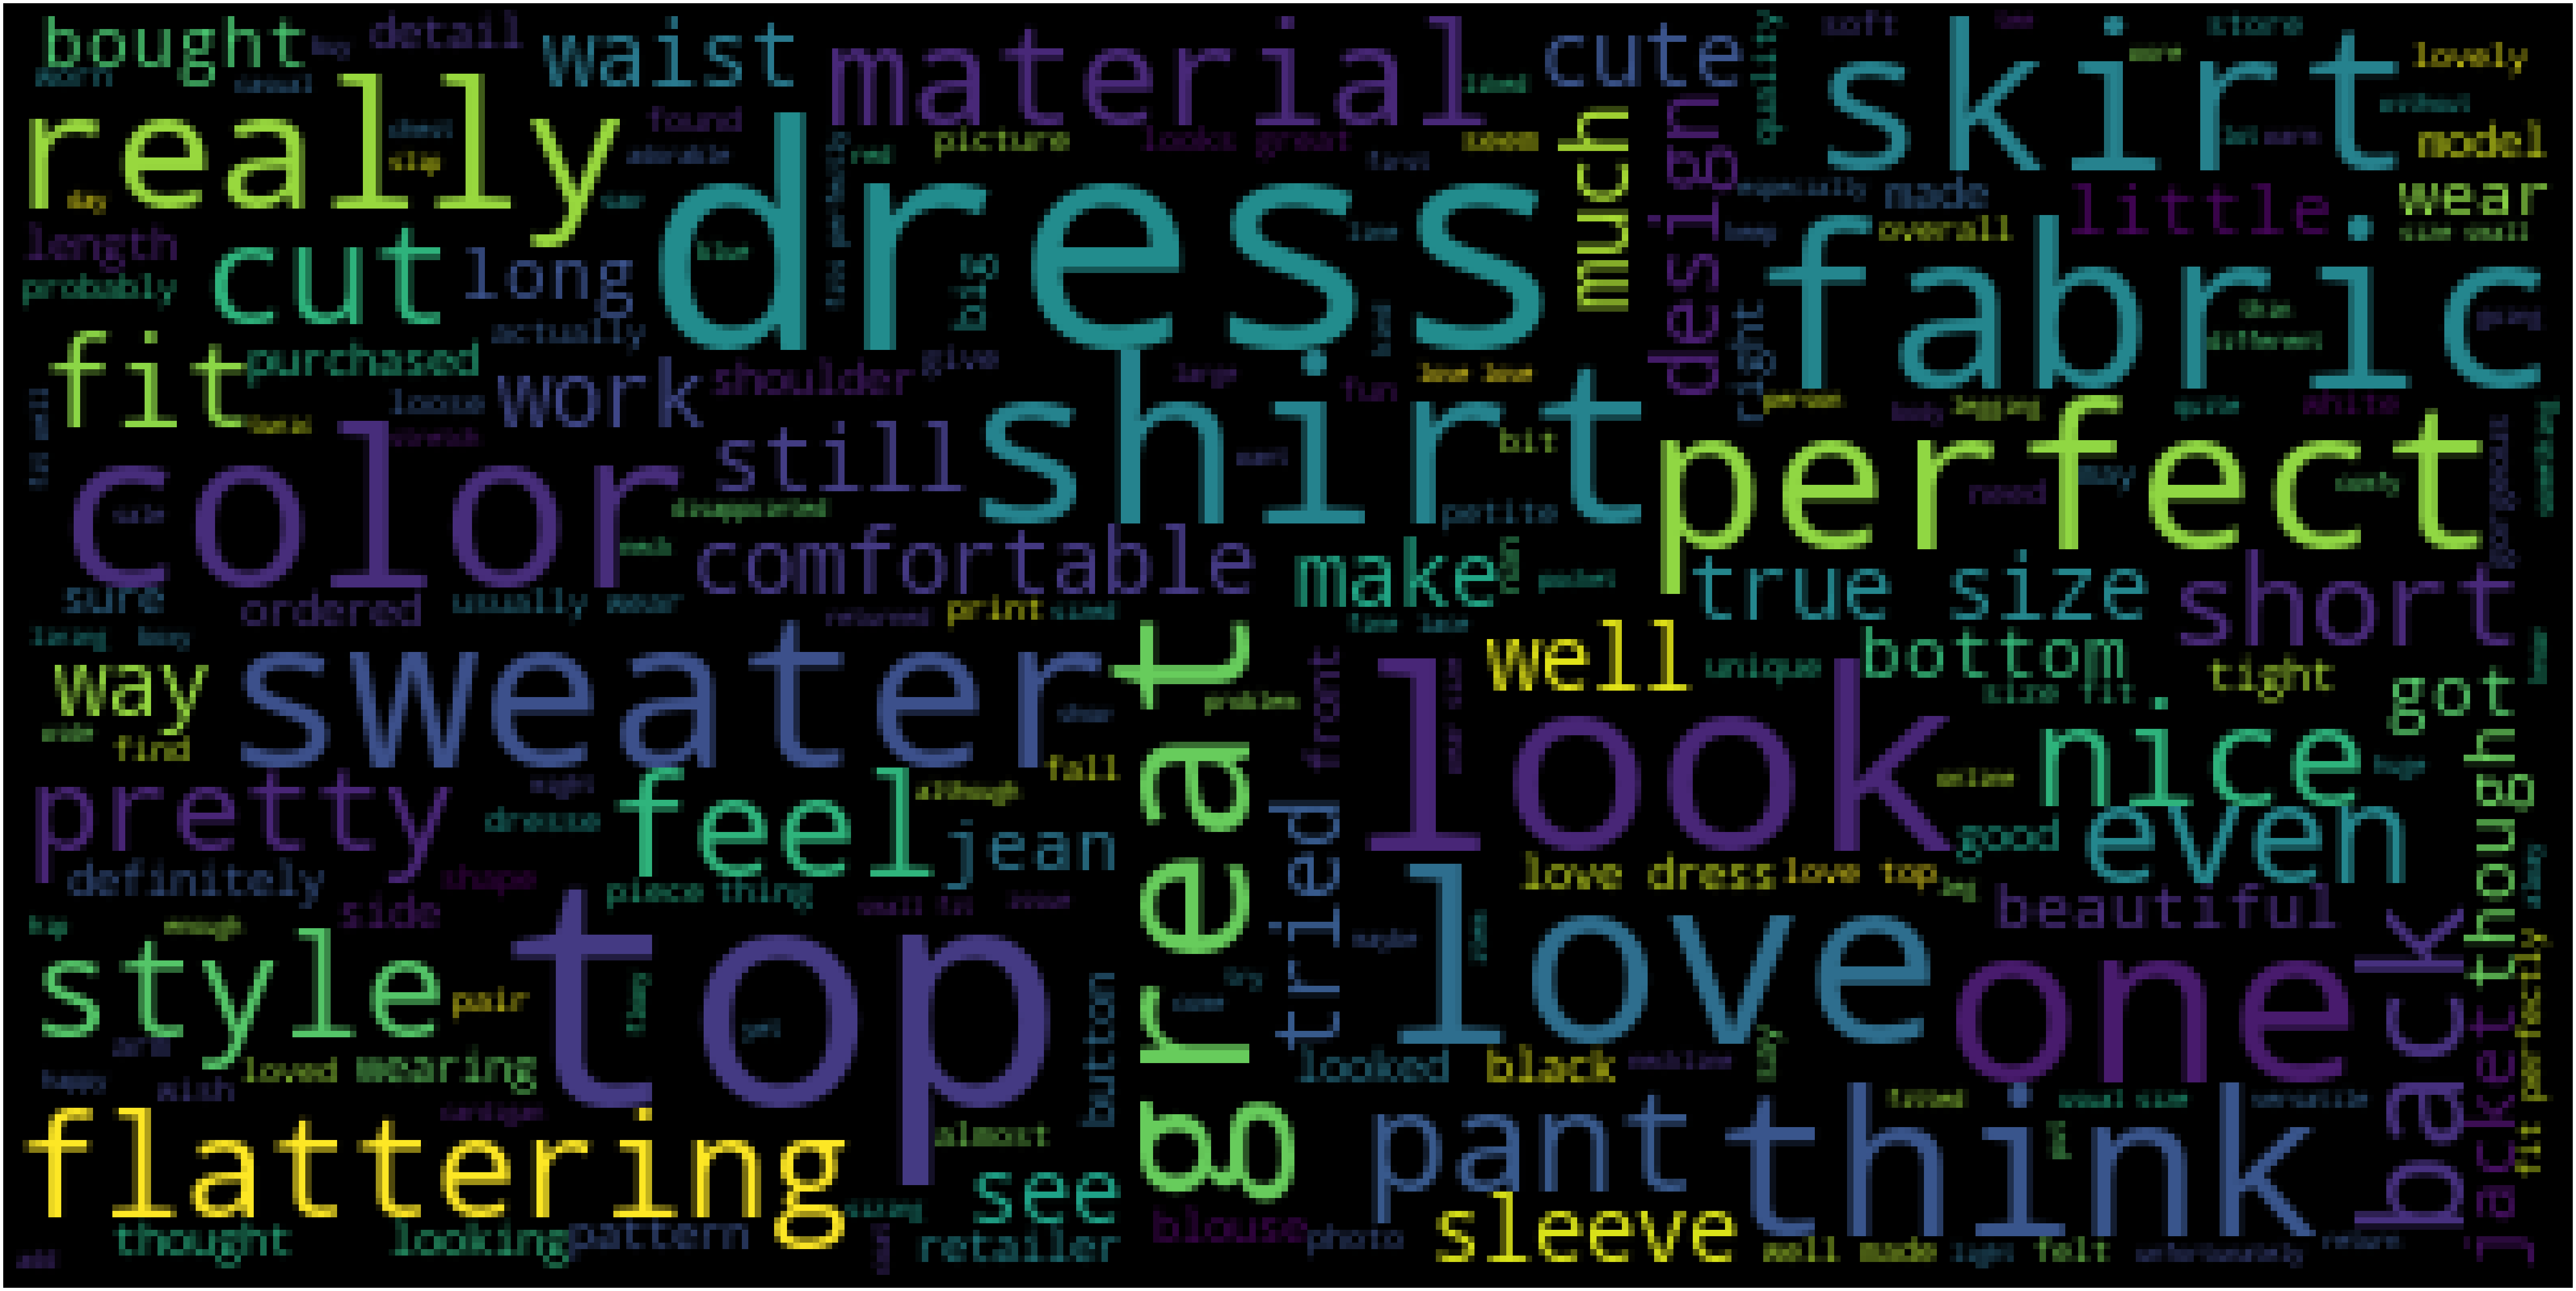

In [41]:
wc(cleaned_data_title,'black','Most Used Words')

*The above wordcloud is for the most oftenly used words in the Review Text column*

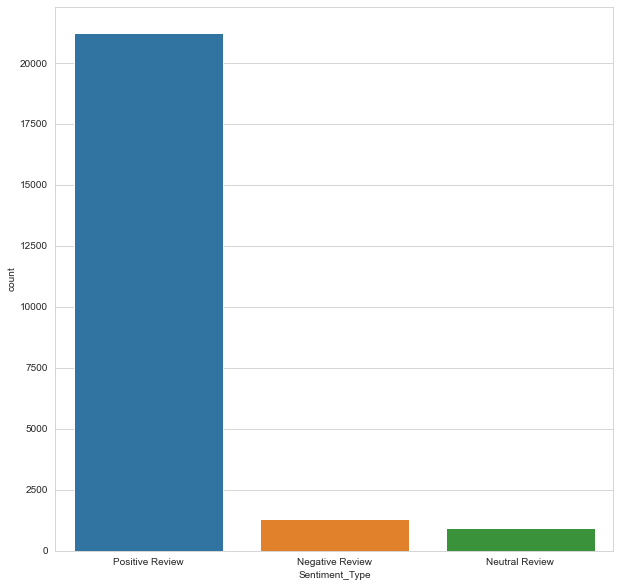

In [44]:
from textblob import TextBlob

bloblist_desc = list()

df_review_str=df['Review Text'].astype(str)
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])
 
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)


*According to the above graph, there are more positive reviews but again it depends on the polarity value. I condsidered sentiment value > 0 is Positive Review..*

In [45]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

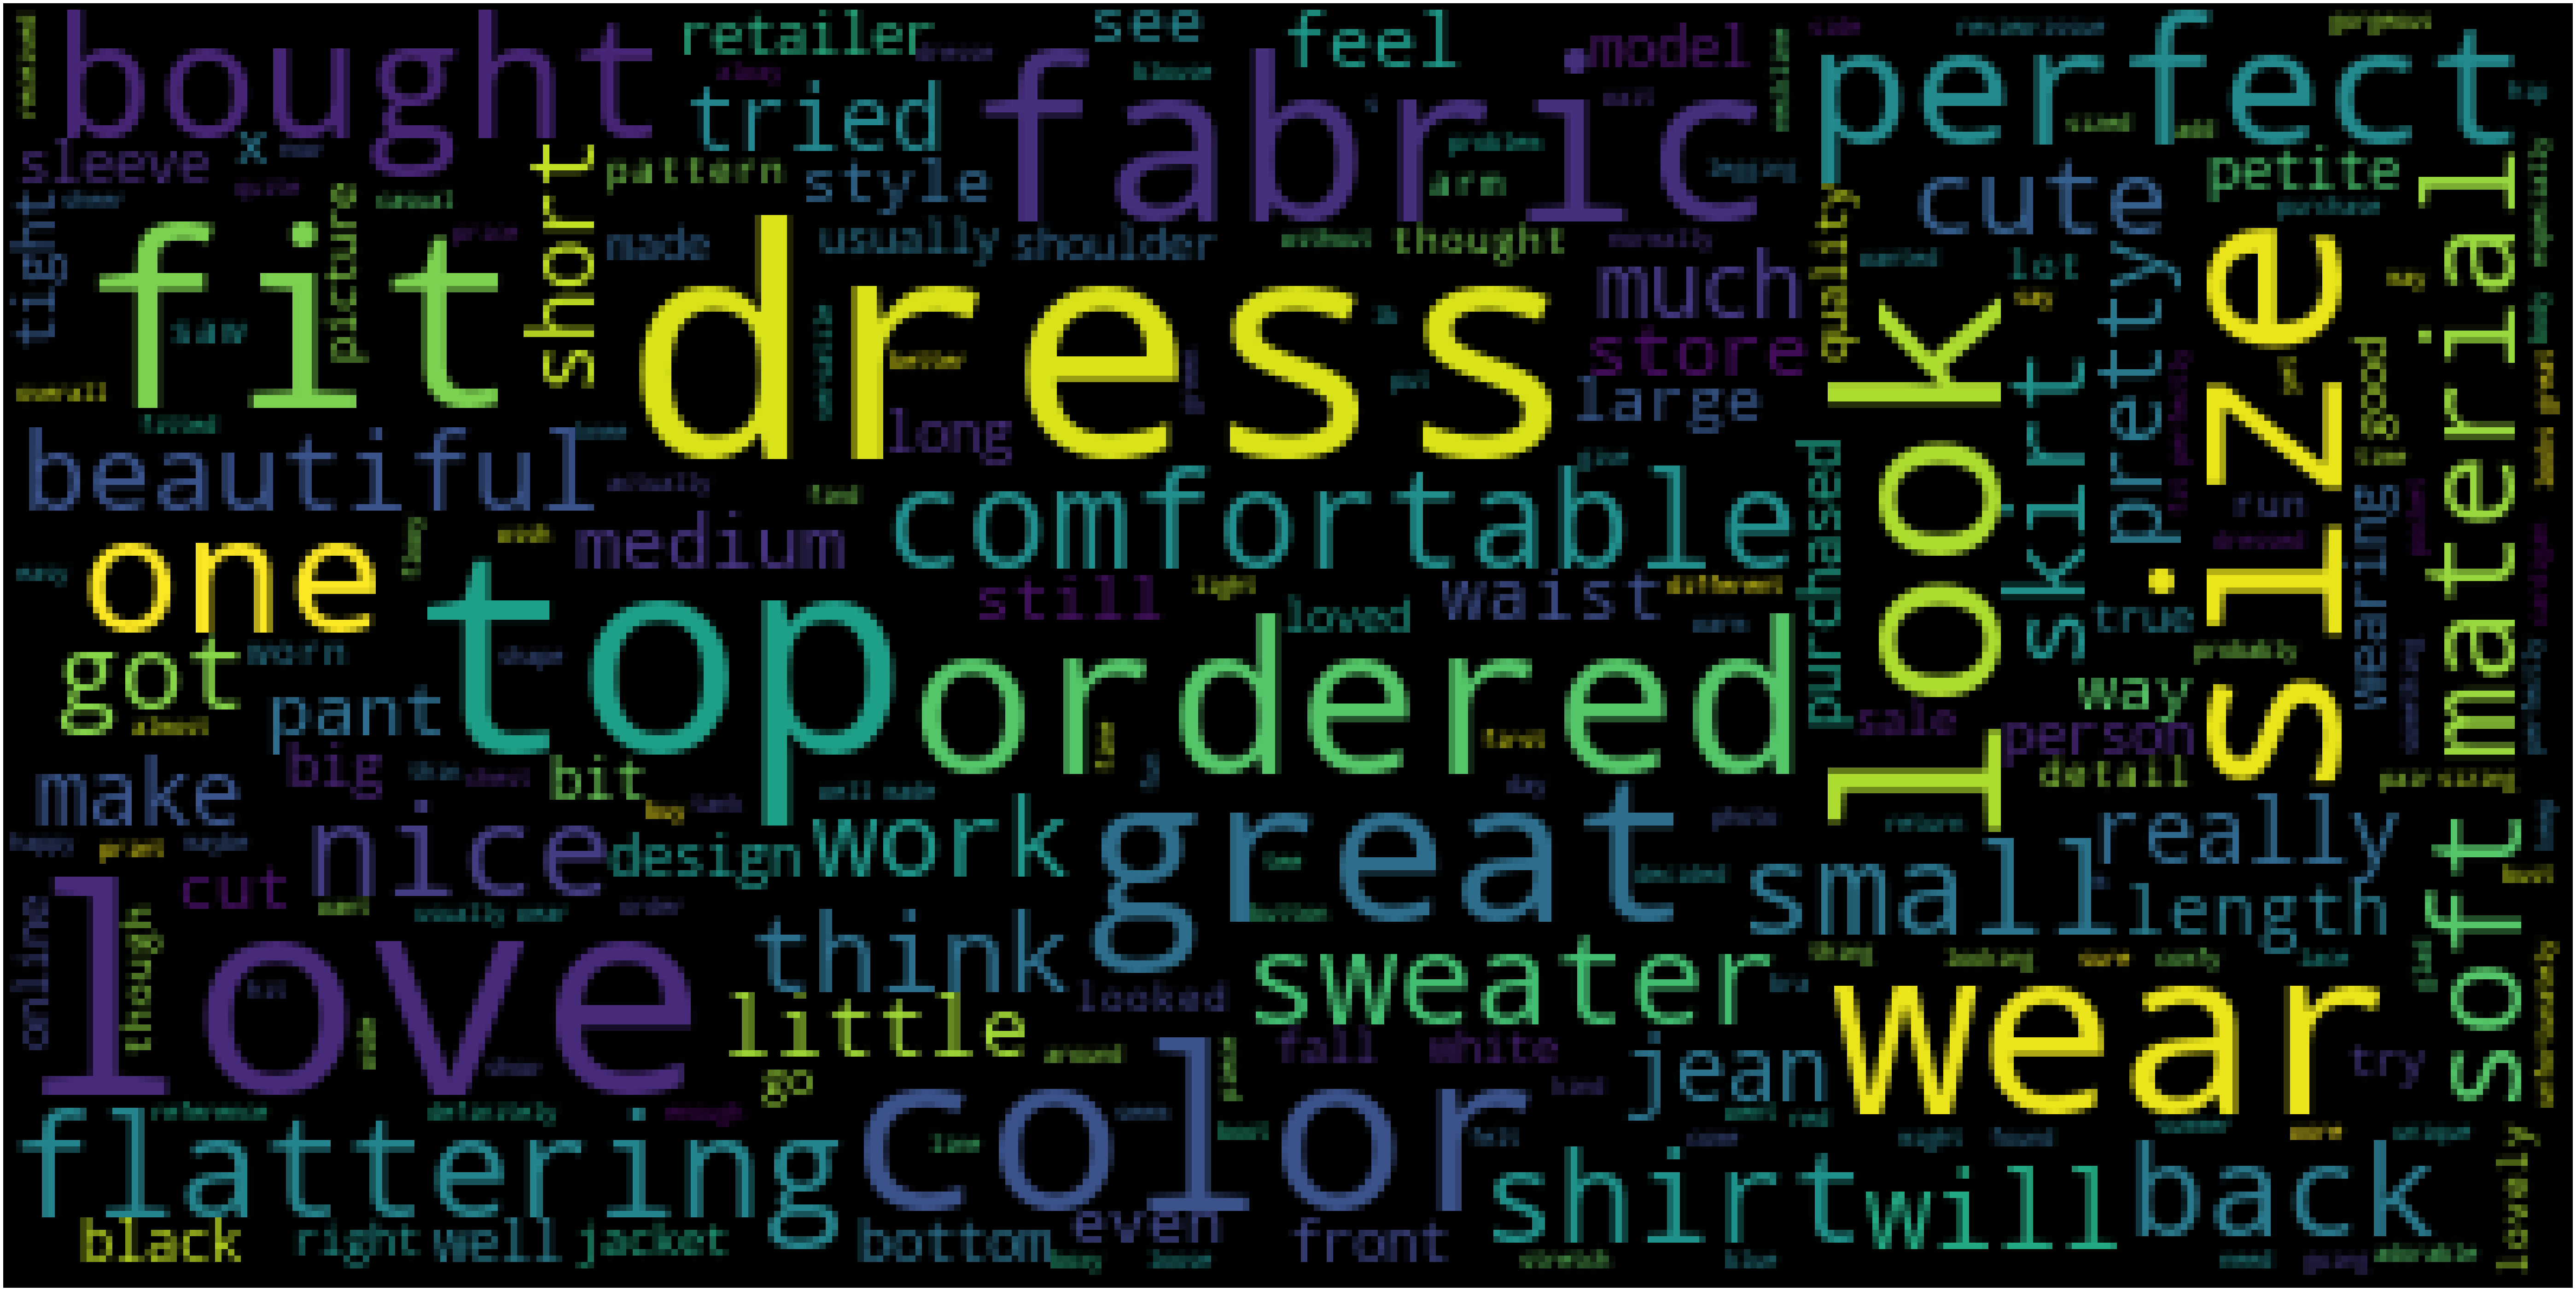

In [46]:
wc(positive_reviews['Review'],'black','Most Used Words')

 *The above wordcloud only for the Positive reviews.*

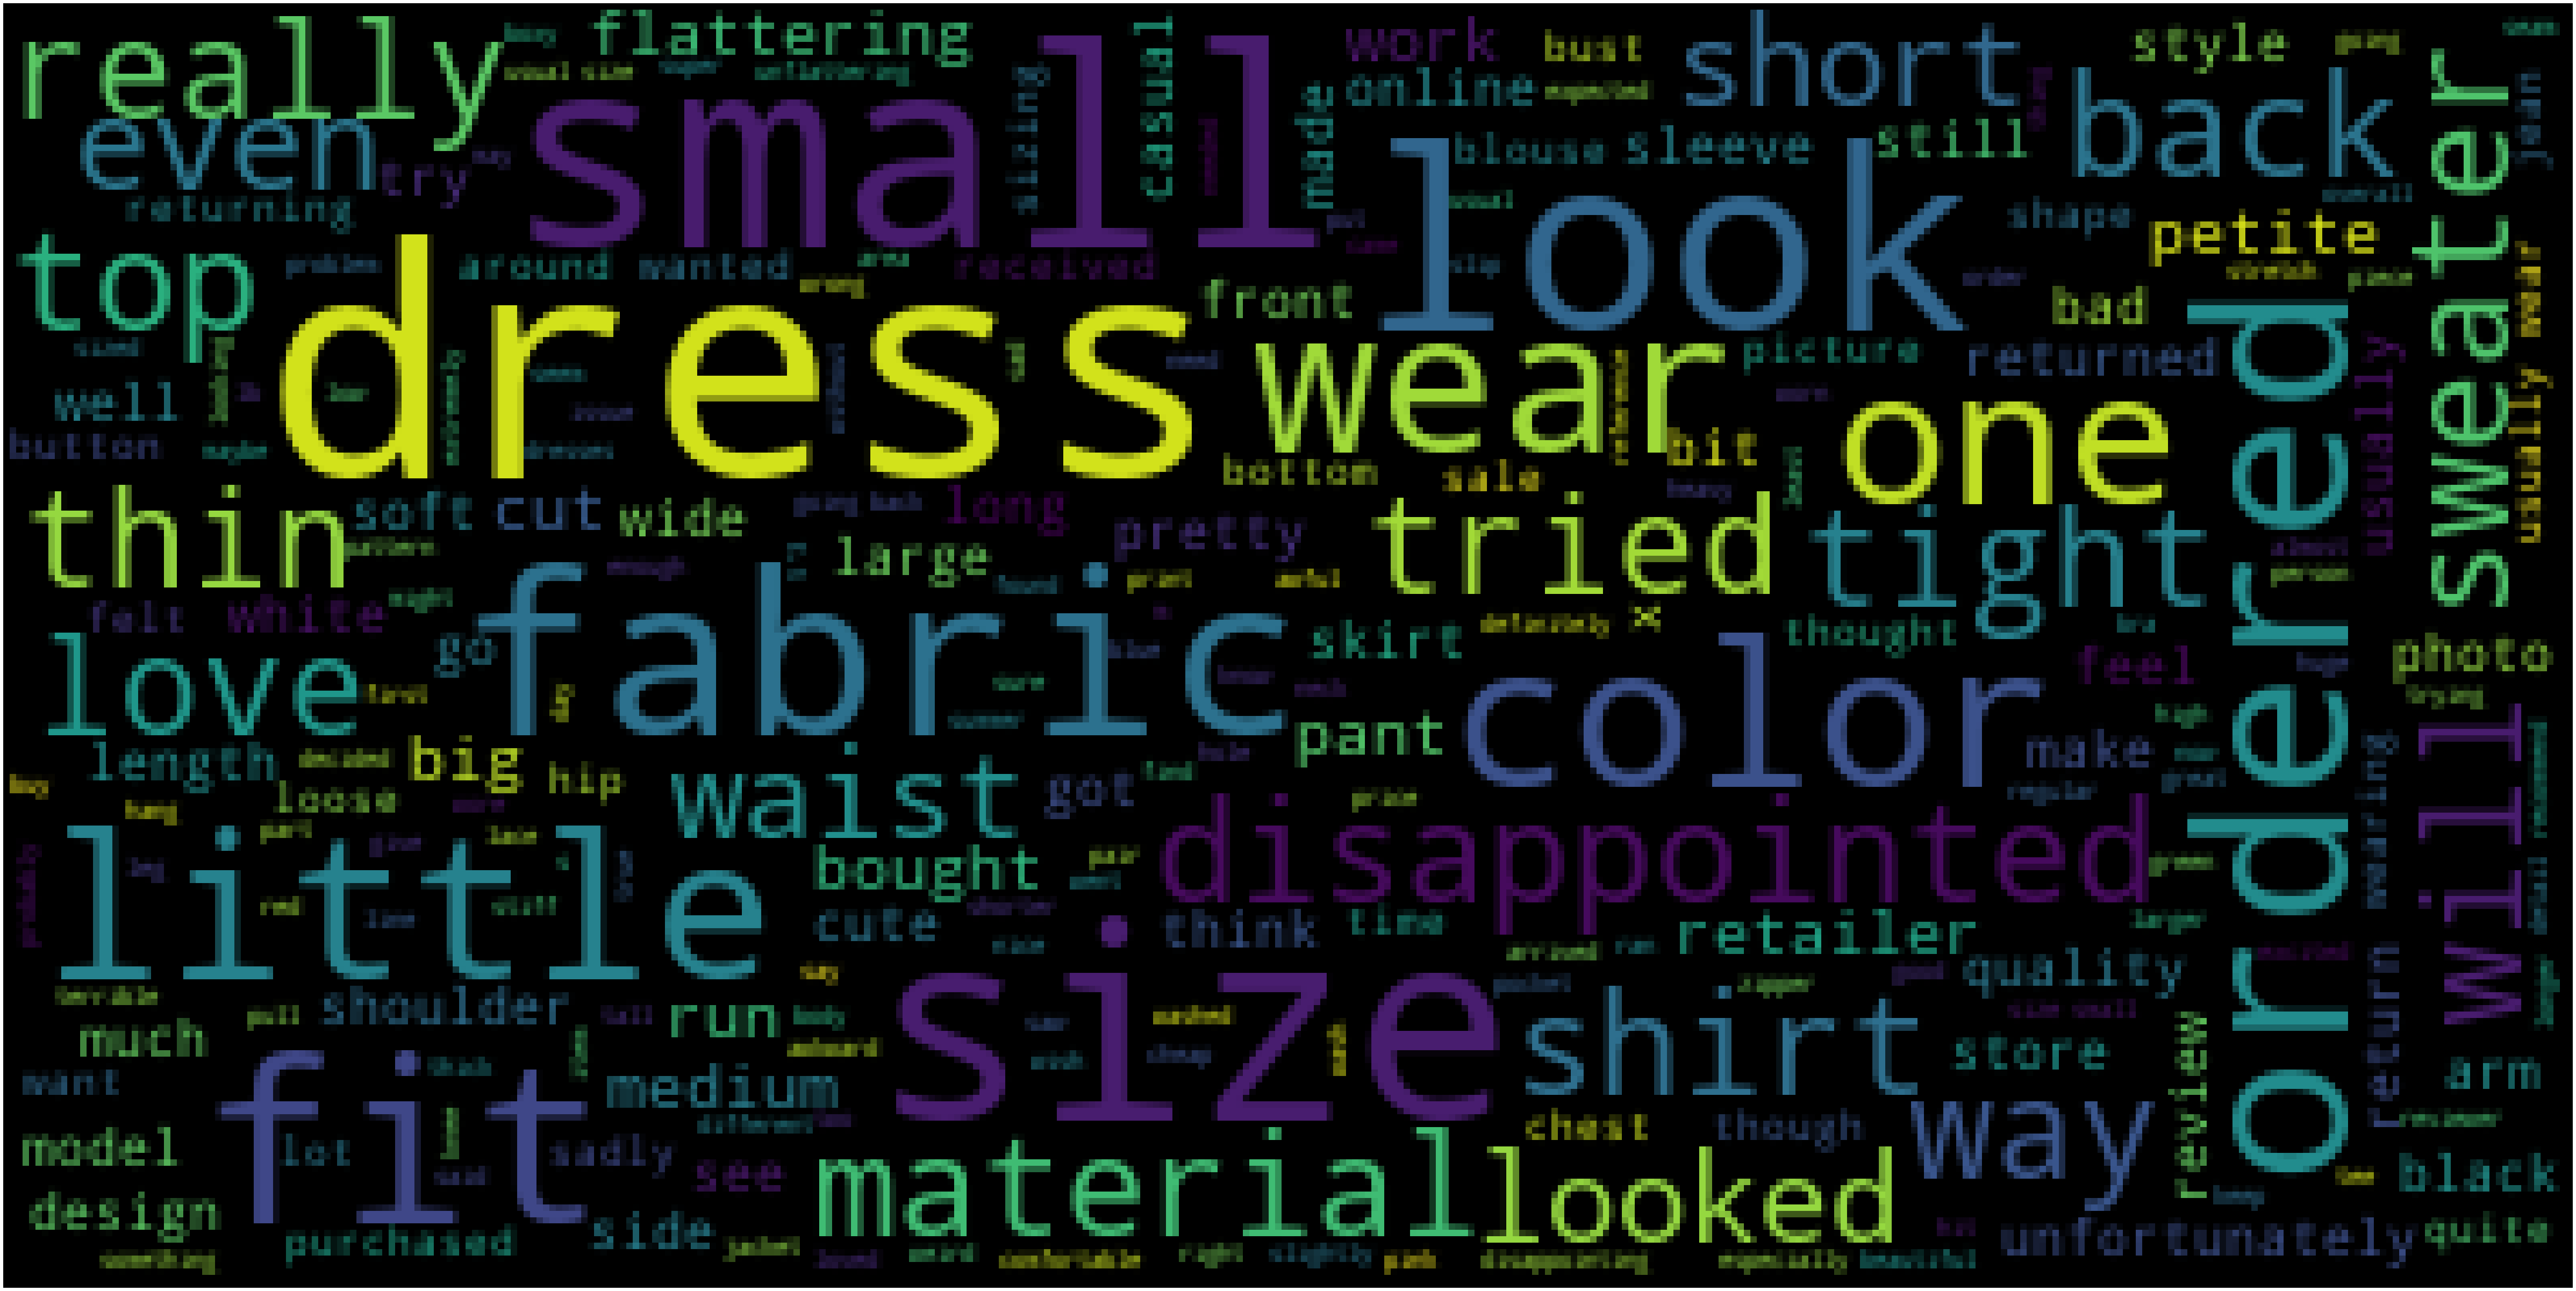

In [47]:
wc(negative_reviews['Review'],'black','Most Used Words')

*The above wordcloud only for the Negative reviews.*

In [48]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [49]:
df['Review Text'].head(5).apply(text_process)

0    [Absolutely, wonderful, silky, sexy, comfortable]
1    [Love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: Review Text, dtype: object

*This is how the above function works. Basically, the above function removes the punctuations, converts word into lower case, and removes the stopwords from the sentence.*

**Vectorization**

*At this moment, we have our review text column as a token (which has no punctuations and stopwords).
We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.*

In [50]:
df=df.dropna(axis=0,how='any')
rating_class = df[(df['Rating'] == 1) | (df['Rating'] == 5)]
X_review=rating_class['Review Text']
y=rating_class['Rating']

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [52]:
print(len(bow_transformer.vocabulary_))

13953


*Now, the above number is the  size of the vocabulary stored in the vectoriser (based on X_review) *

In [53]:
X_review = bow_transformer.transform(X_review)

**Training Data and Test Data**

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

**Train our model **

*To predict the rating of the reviews,  we will use Naive Bayes Machine Learning Algorithm. Since this works well with the text data. *

In [55]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

**Testing the model**

In [56]:
predict=nb.predict(X_test)

*Once we predicted the values, now the most important task is to check and evaluate our model against the actual ratings (stored in y_test) using confusion_matrix and classification_report from Scikit-learn.*

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[  65  149]
 [  11 3240]]


              precision    recall  f1-score   support

           1       0.86      0.30      0.45       214
           5       0.96      1.00      0.98      3251

    accuracy                           0.95      3465
   macro avg       0.91      0.65      0.71      3465
weighted avg       0.95      0.95      0.94      3465



*Woaah !! Our model achieved 95% efficiency. It means the business can predict the users liked the product or not*

**Now let's test the model with the data**

In [58]:
rating_positive=df['Review Text'][3]
rating_positive

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

*First, I want to test with the positive review. I have chosen the above review and its rating is 5. After evaluating it should predict the rating as 5.*

In [59]:
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]

5

*Second, I want to test with the negative review. I have chosen the below review and its rating is 1. After evaluating it should predict the rating as 1.*

In [60]:
rating_negative=df['Review Text'][61]
rating_negative

"3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

In [61]:
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

1

**Now, I want to predict which product is recommended and which is not**

In [62]:
X_predict_recommend=df['Review Text']
y_recommend=df['Recommended IND']

bow_transformer=CountVectorizer(analyzer=text_process).fit(X_predict_recommend)

X_predict_recommend = bow_transformer.transform(X_predict_recommend)

X_train, X_test, y_train, y_test = train_test_split(X_predict_recommend, y_recommend, test_size=0.3, random_state=101)

nb = MultinomialNB()
nb.fit(X_train, y_train)

predict_recommendation=nb.predict(X_test)


print(confusion_matrix(y_test, predict_recommendation))
print('\n')
print(classification_report(y_test, predict_recommendation))

[[ 603  454]
 [ 242 4600]]


              precision    recall  f1-score   support

           0       0.71      0.57      0.63      1057
           1       0.91      0.95      0.93      4842

    accuracy                           0.88      5899
   macro avg       0.81      0.76      0.78      5899
weighted avg       0.87      0.88      0.88      5899



*For the second prediction (Product Recommendation Vs Review Text), the model predicted 87% efficiency. Now lets test the data.*

In [63]:
rating_positive

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [64]:
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]

1

*In the above block, our model predicted correclty. Since it was a positive review and it was recommended. Hence we got value 1.*

In [65]:
rating_negative

"3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

In [66]:
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

0

*For the above scenario, our model predicted correclty. Since it was a negative review and it was not recommended. Hence we got value 0.*